# **Exploratory Data Analysis on Diabetes Dataset**


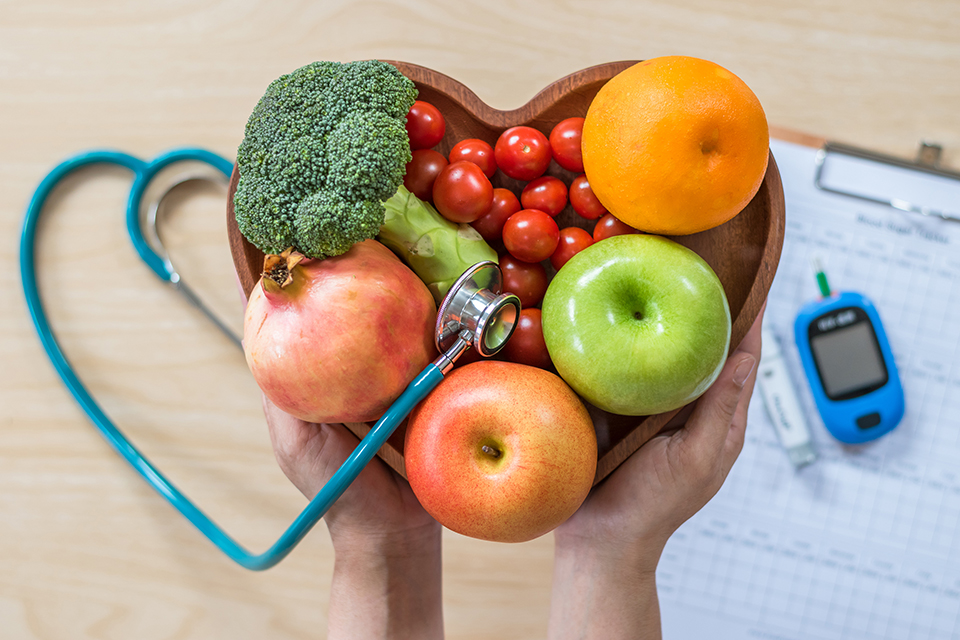

# **Importing Packages**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

# **Upload Dataset**

In [2]:
df = pd.read_csv('diabetes.csv')

# **Data Preprocessing**

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The different columns present in the dataset are:

* Pregnancies -> Number of times Pregnant

* Glucose -> Plasma glucose concentration

* BloodPressure -> Diastolic blood pressure (mm Hg)

* SkinThickness -> Triceps skin fold thickness (mm)

* Insulin -> 2-Hour serum insulin (mu U/ml)

* BMI -> Body Mass Index

* DiabetesPedigreeFunction -> Diabetes pedigree function

* Age -> Age in years

* Outcome -> Whether the lady is diabetic or not, 0 represents the person is not diabetic and 1 represents that the person is diabetic.



In [4]:
print("Number of rows present in the dataset are: ", df.shape)

Number of rows present in the dataset are:  (768, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
%pip install seaborn

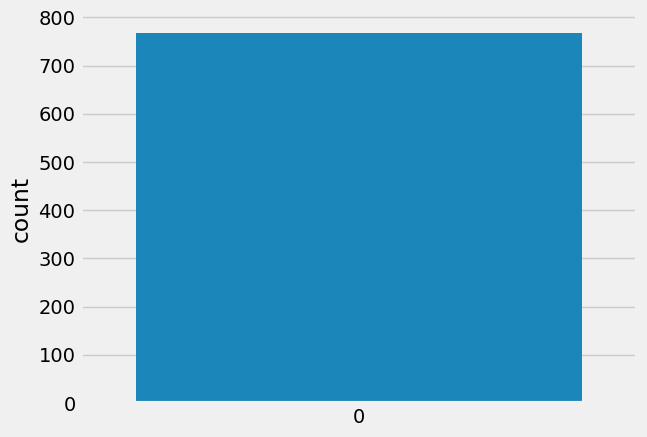

In [8]:
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(df['Outcome'])
plt.show()

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

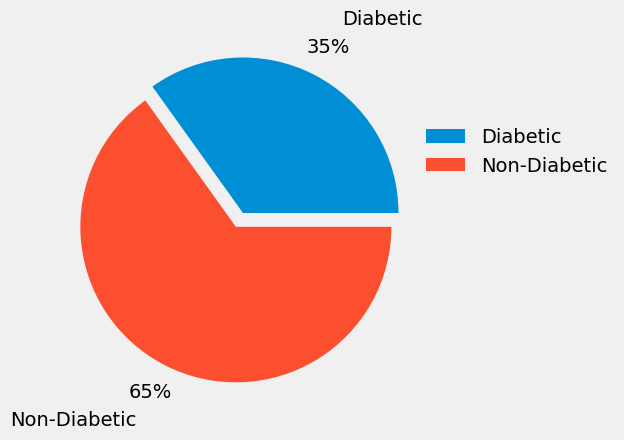

In [10]:
fig, ax = plt.subplots()

labels = ['Diabetic', 
         'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

**The distribution of the dependent variable is not skewed or imbalanced. We can move ahead with the same data without having to apply SMOTE or undersampling or oversampling techniques. But we do need to make that we distribution of the classes remain same when we split our data to train and test set.**

**Before we move ahead, we need to check what are the minimum values for each column, certain columns like Glucose or Insulin can not have values as 0. Therefore, we need to take care of such values.**

In [11]:
for col in df.columns:
    print("The minimum value fore the columns {} is {}".format(col, df[col].min()))

The minimum value fore the columns Pregnancies is 0
The minimum value fore the columns Glucose is 0
The minimum value fore the columns BloodPressure is 0
The minimum value fore the columns SkinThickness is 0
The minimum value fore the columns Insulin is 0
The minimum value fore the columns BMI is 0.0
The minimum value fore the columns DiabetesPedigreeFunction is 0.078
The minimum value fore the columns Age is 21
The minimum value fore the columns Outcome is 0


**Now out of the above columns having zero as their minima, only Pregnancie Column can take the values as zero, so what should do we do with those columns that have zero as their minimum even if they aren't supposed to?**

## Checking Null Values

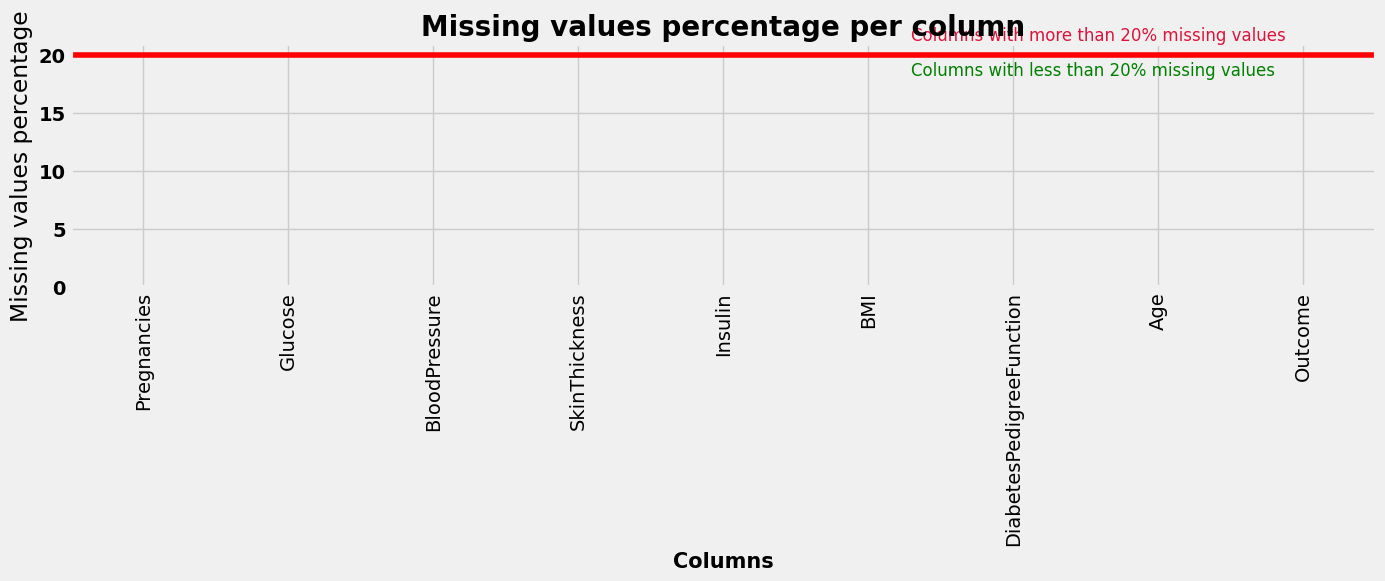

In [12]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(df, 20, color=sns.color_palette('Reds',15))

**You might be wondering that there are no null values in the dataset, but are you sure? Remember what we had discussed in the previous section where certain columns were having zero as their minima eventhough they aren't supposed to. Those values will be considered as null values. Let's replace the zeros present in the Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns with null.**

In [13]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

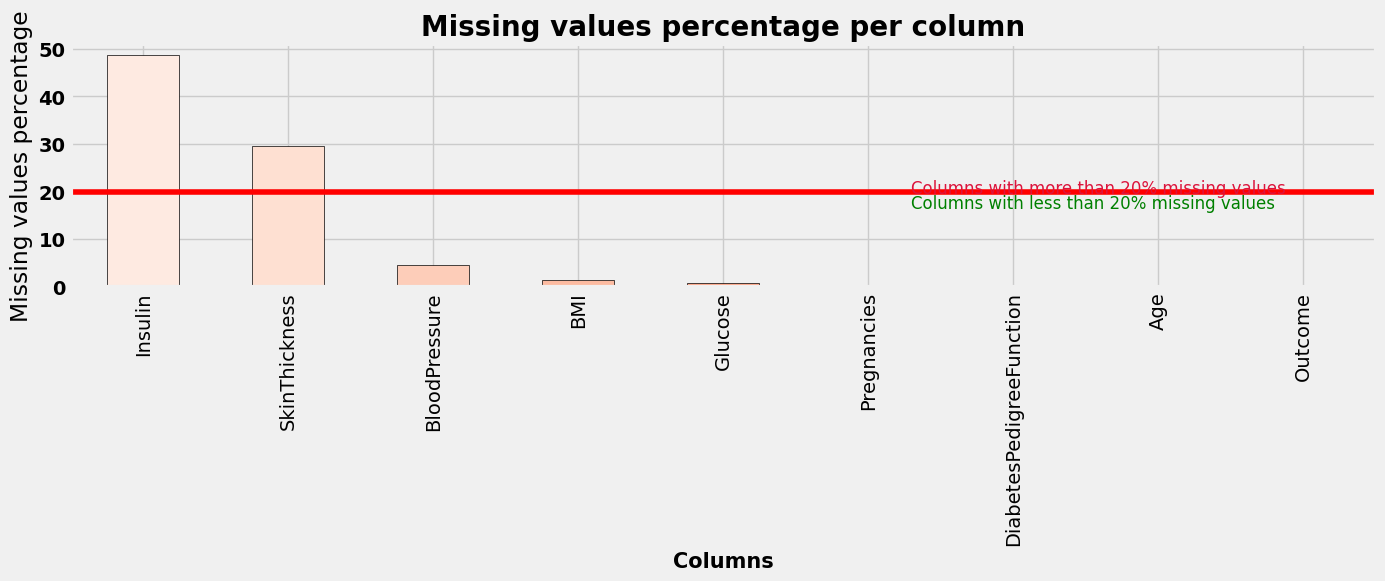

In [14]:
msv_1(df, 20, color=sns.color_palette('Reds',15))

**We can observe that Insulin column has close to 50% zero or null values, followed by SkinThickness that has close to 30% missing values. We will be filling these values later.**

# **Exploratory Data Analysis**

**In this section, we will be doing some basic Exploratory Data Analysis to get the "feel" of the data, we will be checking the distributions, the correlations etc of the different columns and try to remove the null values present.**

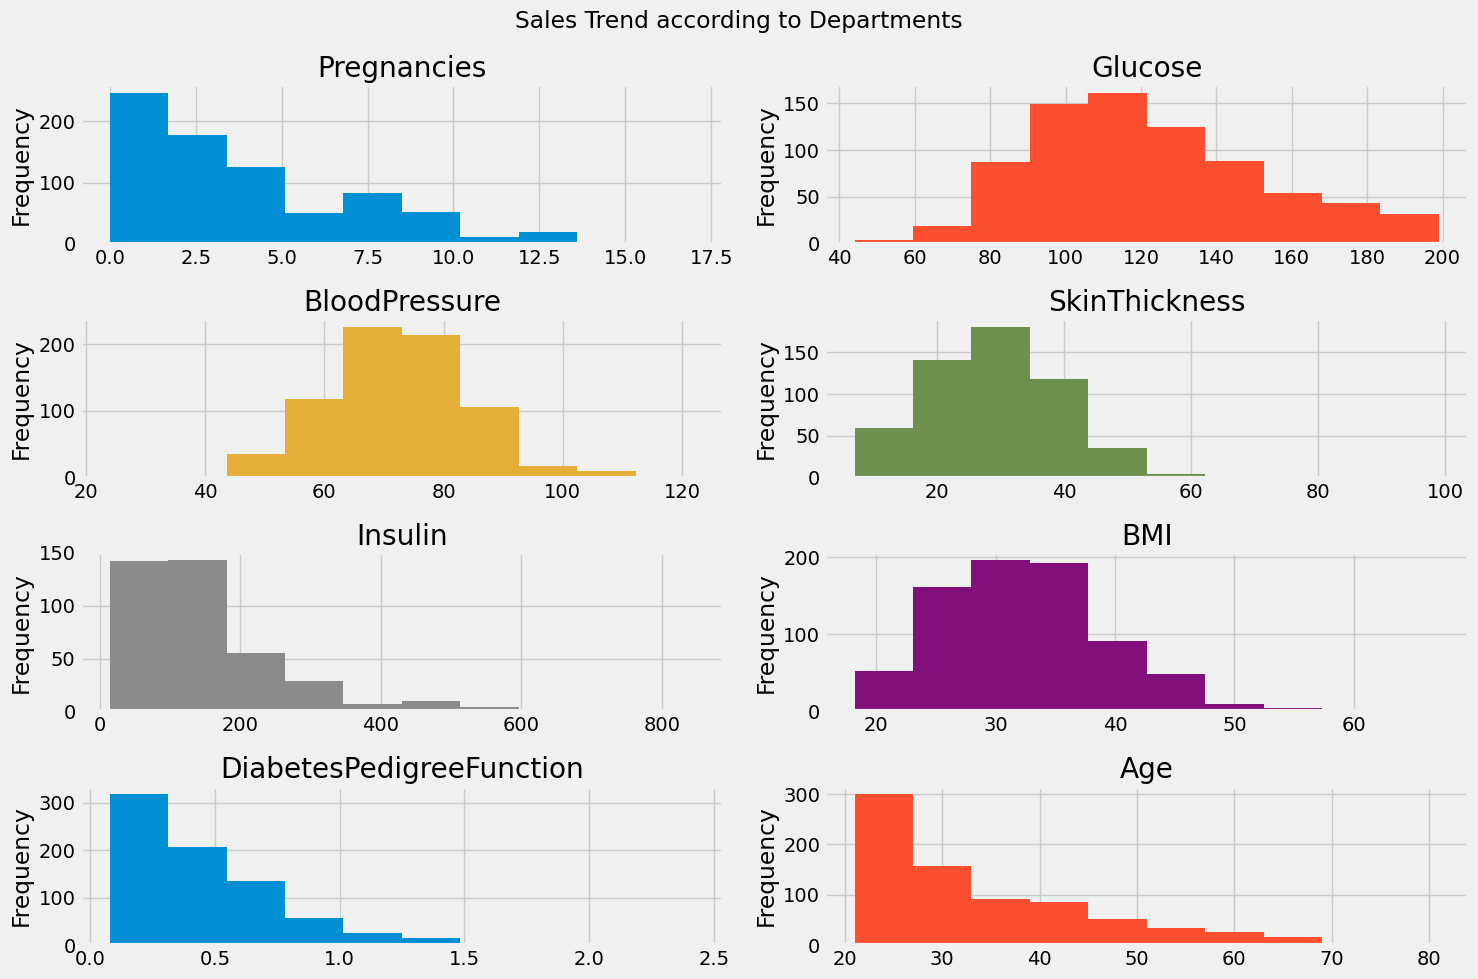

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = df.drop('Outcome', axis = 1).columns
for col in columns:
    df[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.suptitle('Sales Trend according to Departments')
plt.tight_layout()
plt.show()

**Let's check the skewness of each of the columns.**

**Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution. The peak of the histogram represents the mode.**

In [16]:
from scipy.stats import skew
for col in df.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, df[col].skew()))

Skewness for the column Pregnancies is 0.9016739791518588
Skewness for the column Glucose is 0.5309885349396285
Skewness for the column BloodPressure is 0.13415273171959252
Skewness for the column SkinThickness is 0.690619013984192
Skewness for the column Insulin is 2.166463843812443
Skewness for the column BMI is 0.5939697505712673
Skewness for the column DiabetesPedigreeFunction is 1.919911066307204
Skewness for the column Age is 1.1295967011444805


**Columns like Pregnancies, Glucose, BloodPressure, SkinThickness and BMI are not that much skewed. We can fill null values with the mean for these columns, but for columns like Insulin and DiabetesPedigreeFunction, we will have to replace them will median due to the effect of skewness.**

In [17]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median()) # Filling null values with the median.

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    df[col] = df[col].fillna(df[col].mean())

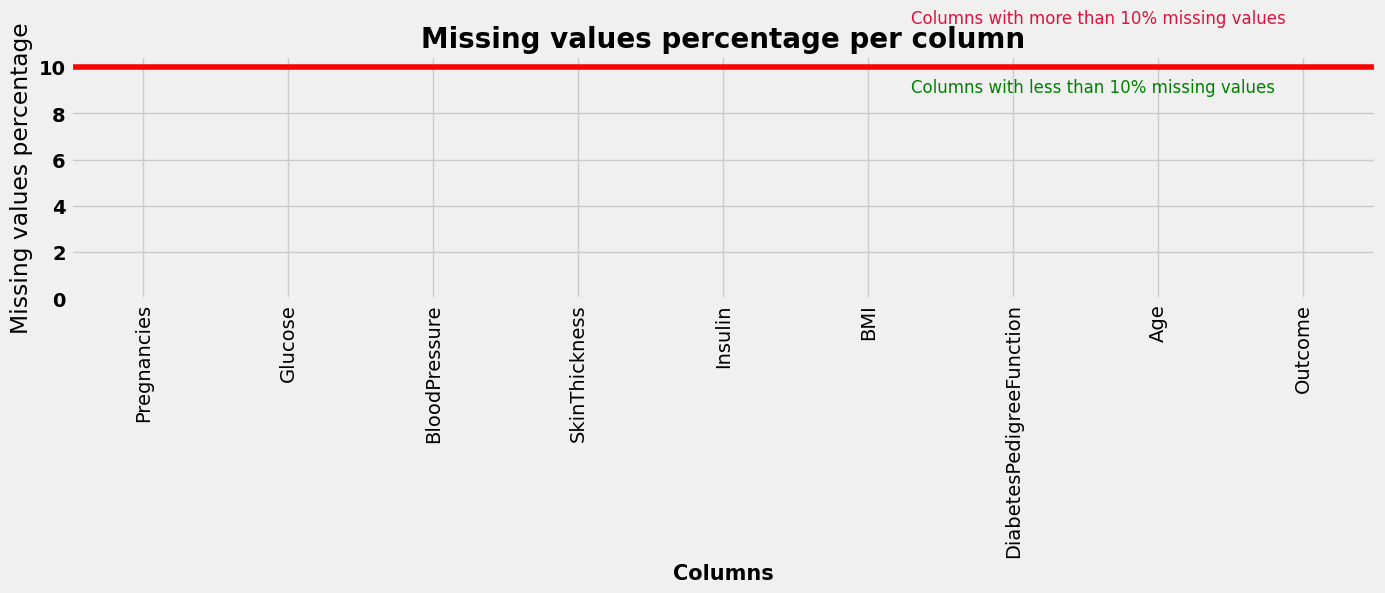

In [18]:
msv_1(df, 10, color=sns.color_palette('Greens',15))

In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**All null values are taken care of now**

In [20]:
def mean_target(var):
    """
    A function that will return the mean values for 'var' column depending on whether the person
    is diabetic or not
    """
    return pd.DataFrame(df.groupby('Outcome').mean()[var])

In [21]:
def distplot(col_name):
    """
    A function that will plot the distribution of column 'col_name' for diabetic and non-diabetic people separately
    """
    plt.figure()
    ax = sns.distplot(df[col_name][df.Outcome == 1], color ="red", rug = True)
    sns.distplot(df[col_name][df.Outcome == 0], color ="lightblue",rug = True)
    plt.legend(['Diabetes', 'No Diabetes'])

## Pregnancies

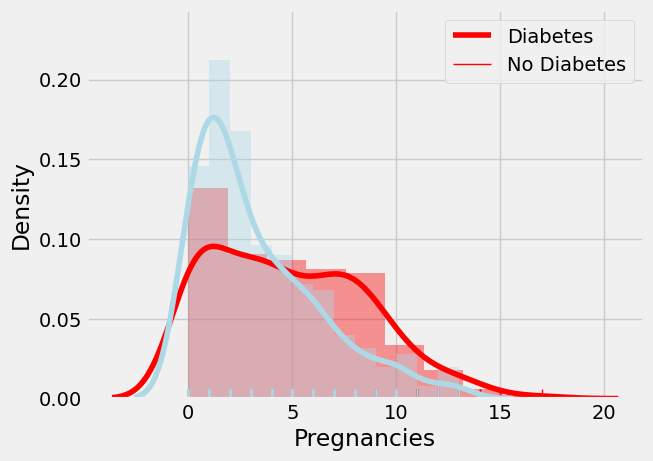

In [22]:
distplot('Pregnancies')

In [23]:
mean_target('Pregnancies')

,Pregnancies
Outcome,
0,3.298000
1,4.865672


**We can see that the number of pregnancies is high for the diabetic people**

## Insulin

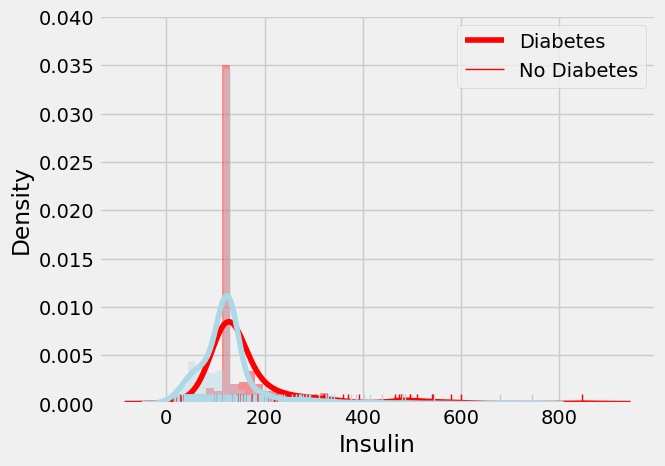

In [24]:
distplot('Insulin')

In [25]:
mean_target('Insulin')

,Insulin
Outcome,
0,127.792000
1,164.701493


**Diabetic People tend to have more Insulin level.**

## BloodPressure

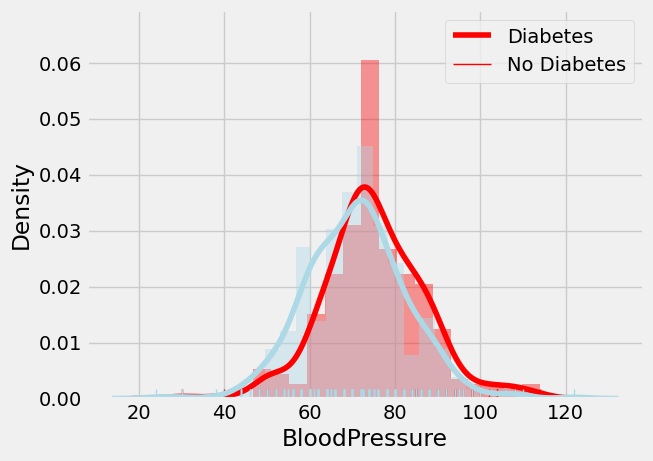

In [26]:
distplot('BloodPressure')

In [27]:
mean_target('BloodPressure')

,BloodPressure
Outcome,
0,70.935397
1,75.147324


**The mean of the blood pressure is greater for diabetic people as compared to the non-diabetic people**

## **Glucose**

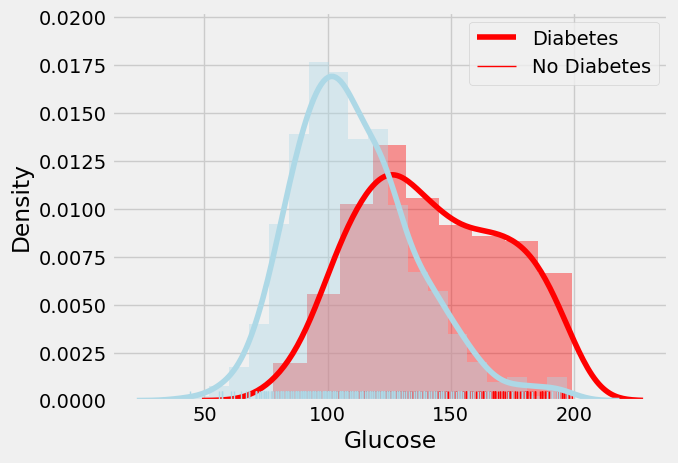

In [28]:
distplot('Glucose')

In [29]:
mean_target('Glucose')

,Glucose
Outcome,
0,110.710121
1,142.165573


**Diabetic People tend to have much higher Glucose level**

## **Comman Man Analysis**

**Let's think like a common man, and analyze the data.**

**First, we would know what is the effect of Age on the Outcome because we have heard that as the age increases, the chances of diabetes also commonly increases.**

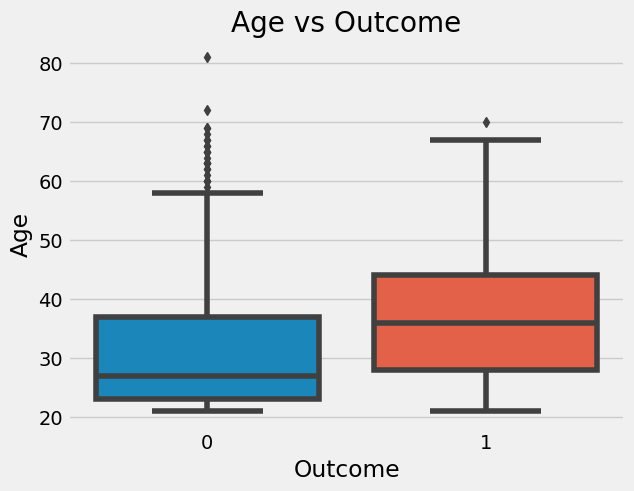

In [30]:
sns.boxplot(x = 'Outcome', y = 'Age', data = df)
plt.title('Age vs Outcome')
plt.show()

**Yes, we were right, the median of the age of diabetic people is greater than that of non-diabetic people.**

**Let's also check the effect of Blood Pressure on the Outcome.**

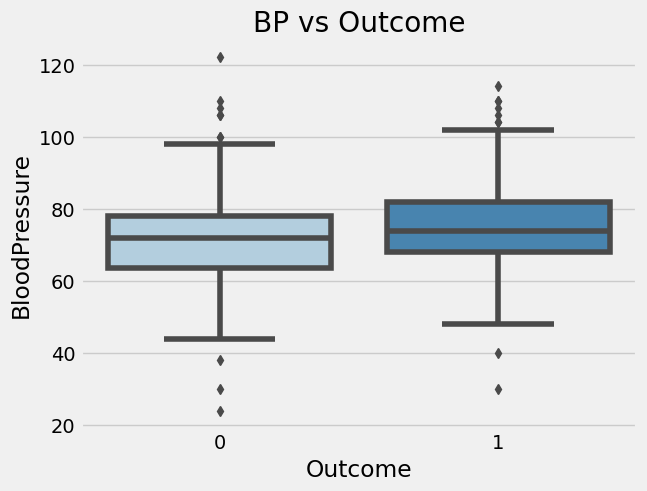

In [31]:
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df, palette = 'Blues')
plt.title('BP vs Outcome')
plt.show()

**The median of the BloodPressure of diabetic people lies close to the 75th Percentile of non-diabetic people.**

**The next thing a common man would check is the relationship between age and BP**

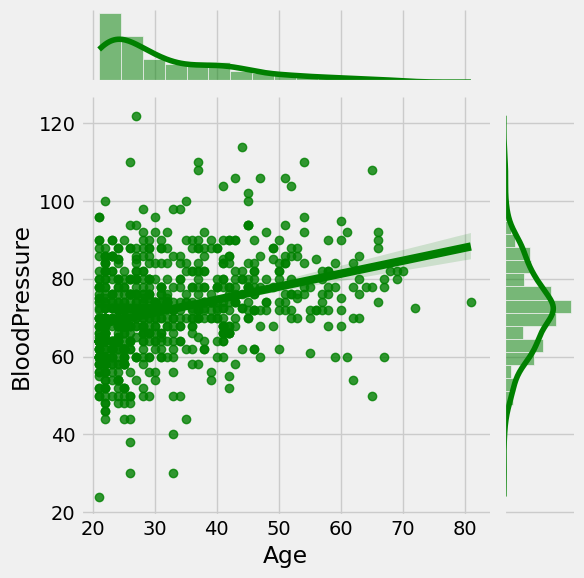

In [32]:
sns.jointplot(x='Age',y='BloodPressure', data=df, kind = 'reg', color = 'green')

**Hmm, as the age increases, generally the Blood Pressure also increases**

**One would also want to know the chances of getting diabetes, if it is common in the family. We can check that with the Diabetes Pedigree Function.**

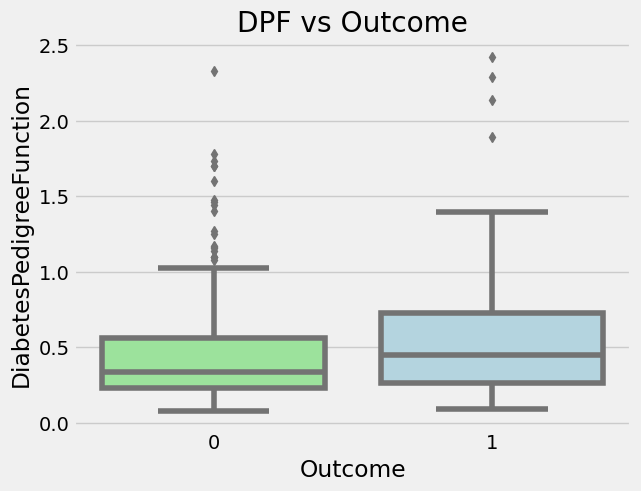

In [33]:
my_pal = {0: "lightgreen", 1: "lightblue"}
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df, palette = my_pal)
plt.title('DPF vs Outcome')
plt.show()

**Quite a proportion of people having high DPF does not end up having Diabetes.  But usually the diabetic people have DPF value close to 0.5 (50th Percentile)**

## Gluscose Level

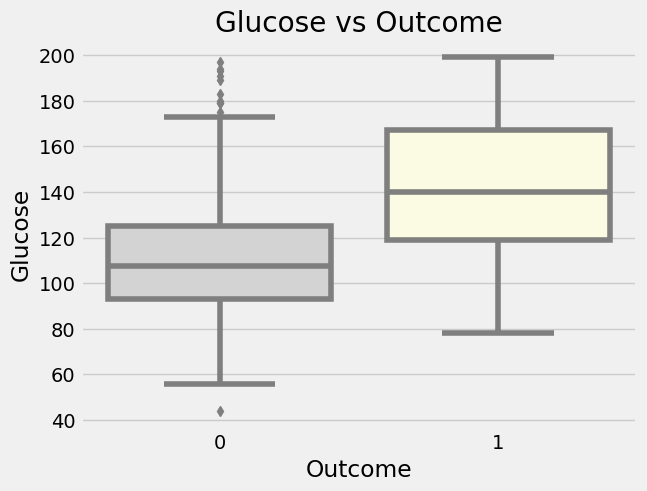

In [34]:
my_pal = {0: "lightgrey", 1: "lightyellow"}
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df, palette = my_pal)
plt.title('Glucose vs Outcome')
plt.show()

**Wow! the median of the Glucose level of Diabetic People is greater than the 75th Percentile of the glucose level of non-diabetic people. Therefore having a high glucose level does increase the chances of having diabetes.**

## Insulin

**Let's first check whether there is any relation between glucose and insulin level.**

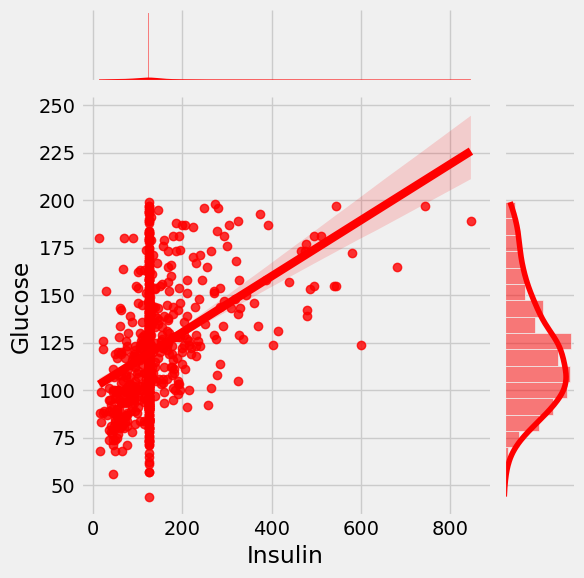

In [35]:
sns.jointplot(x='Insulin',y='Glucose', data=df, kind = 'reg', color = 'red')
plt.show()

**We can see that as the insulin level increases, the Glucose level also increases.**

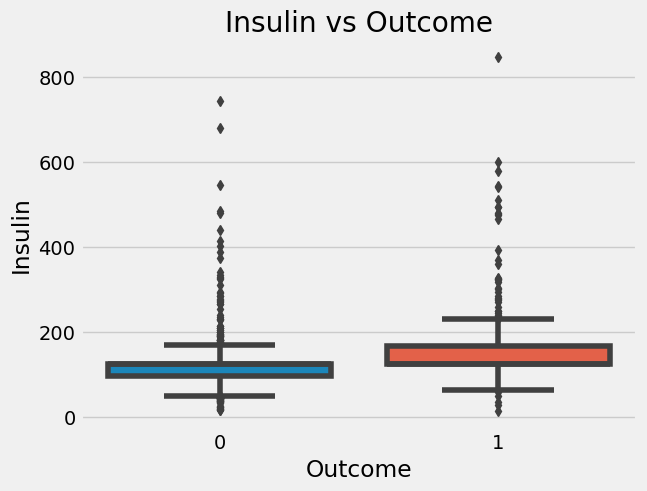

In [36]:
sns.boxplot(x = 'Outcome', y = 'Insulin', data = df)
plt.title('Insulin vs Outcome')
plt.show()

## Body Mass Index

**Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. Does having a higher BMI leads to more chances of being diabetic? Let's check that out!**

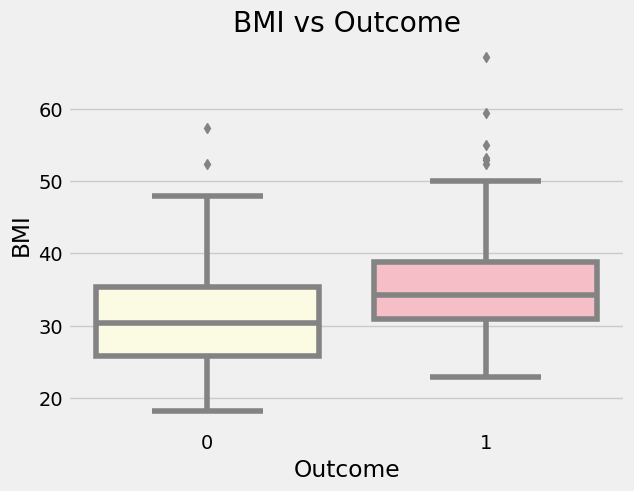

In [37]:
my_pal = {0: "lightyellow", 1: "lightpink"}
sns.boxplot(x = 'Outcome', y = 'BMI', data = df, palette = my_pal)
plt.title('BMI vs Outcome')
plt.show()

**Indeed, the Median BMI of the Diabetic People is greater than the Median BMI of the Non-Diabetic people.**

# Correlation Matrix

<AxesSubplot:>

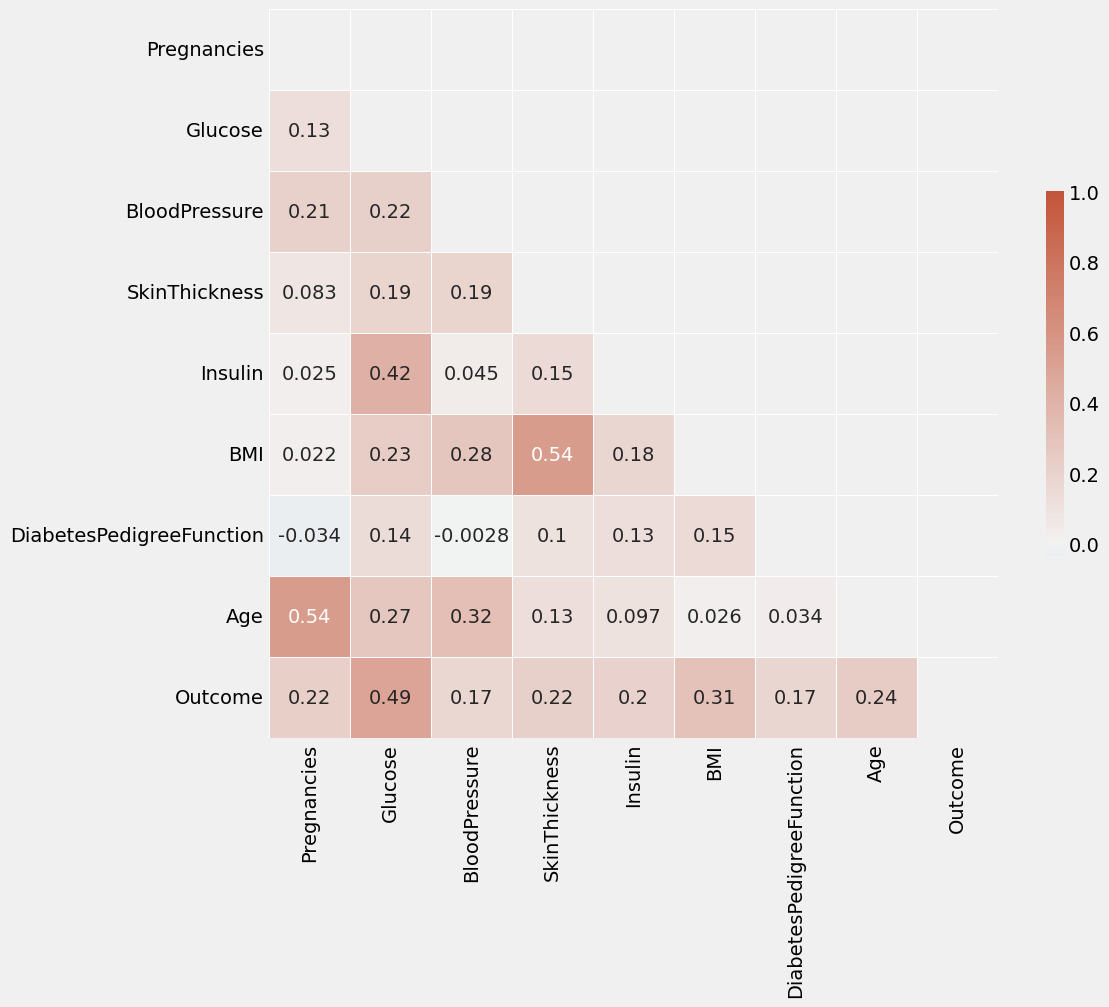

In [38]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

**From the above heatmap, we can observe that all the features are weakly correlated, so that removes multicollinearity out of equation. Multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. Models like Logistic Regression assumes the presence of non-collinearity among the features, if multicollinearity is present it can lead to the bad performance of such models.**